# 

# MSPrime Simulations

In [ ]:
# Install Locally
python3 -m venv ~/envs/msprime_env
source ~/envs/msprime_env/bin/activate
pip install --upgrade pip setuptools wheel
pip install msprime

# Install tskit and stdpopsim 
pip install tskit stdpopsim

#Install jupyter and ipykernel
pip install jupyter ipykernel

#Register the env as a kernel - msprime_env (Python 3.9.7)
python -m ipykernel install --user --name=msprime_env --display-name "Python (msprime)"

In [1]:
#Import msprime and tskit
import msprime
import tskit
from IPython.display import SVG, display

## Simulate Ancestry
- samples: Number of individuals to sample. 
- sequence_length: Region to simulate (chr29 962733bp)
- recombination rate: 3.1e-8 per bp per generation (Kawakami et al. 2014)
- population_size: Ne=700 (Wilson et al. 2012)

## Neutral Mutations
- rate: 4.6e-9 (Smeds et al. 2016)
- discrete_genome=False; Conforms to "infinite sites" where each mutation in the simulation occurs at a new site.

In [ ]:
#Simulate Ancestry
ts=msprime.sim_ancestry(
    samples=[msprime.SampleSet(10, ploidy=2)],
    population_size=700,
    sequence_length=962733,
    recombination_rate=3.1e-8,
    model="hudson"
)

#Simulate Neutral Mutations
ts_mut = msprime.sim_mutations(
    ts,
    rate=4.6e-9,
    discrete_genome=False
)

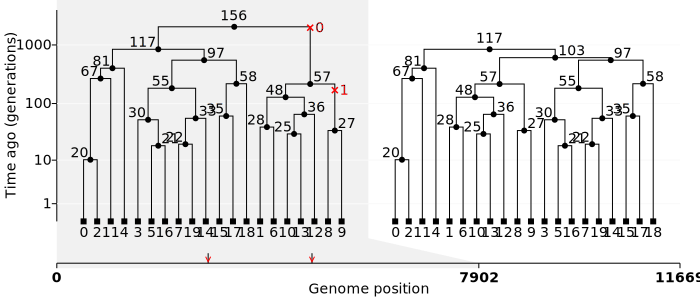

In [ ]:
# #Display a single tree
# display(ts_mut.at_index(0).draw_svg(
#     size=(350,300),
#     time_scale="log_time",
#     y_gridlines=True,
#     y_axis=True,
#     y_ticks=[1,10,100,1000], 
#     all_edge_mutations=True,
# ))

# #Display Tree 
display(ts_mut.draw_svg(
    size=(700,300),
    time_scale="log_time",
    y_gridlines=True,
    y_axis=True,
    y_ticks=[1,10,100,1000],
    x_lim=[0,11669.0]
))

In [12]:
print(ts_mut.at_index(1).interval)

Interval(left=7902.0, right=11669.0)
